In [1]:
library(ggplot2)
library(data.table)

In [2]:
## old CRAM versus new CRAM

In [3]:
cram1 = fread('/Users/ebiederstedt/GraphGenome_viz/data/combined_CRAM_measure_indels_NM.csv')
cram2 = fread('/Users/ebiederstedt/GraphGenome_viz/data/combined_2CRAM_measure_indels_NM.csv')

In [4]:
cram1[, assembly := 'CRAMv1']
cram2[, assembly := 'CRAMv2']

In [5]:
print(dim(cram1)[1])   ## number of mapped alignments, equivalent to `samtools view -F 0x904 -c input1.cram`
print(dim(cram2)[1])   ## number of mapped alignments, equivalent to `samtools view -F 0x904 -c input1.cram`

[1] 56667
[1] 56770


In [6]:
list_of_dts = list(cram1, cram2)

In [7]:
final = Reduce(function(...) merge(..., all = TRUE), list_of_dts)

In [8]:

final = final[, c('INS_readLength', 'DEL_readLength', 'NM_INS_DEL', 'assembly')]

In [9]:
head(final)

INS_readLength,DEL_readLength,NM_INS_DEL,assembly
0.9993261,6.6711590,0,CRAMv2
0.9995299,2.8519041,0,CRAMv2
0.9802446,0.9586077,0,CRAMv2
0.0000000,196.6842105,0,CRAMv1
0.0000000,196.6842105,0,CRAMv2
0.0000000,242.2105263,0,CRAMv2


Warning message:
“Removed 34539 rows containing non-finite values (stat_boxplot).”

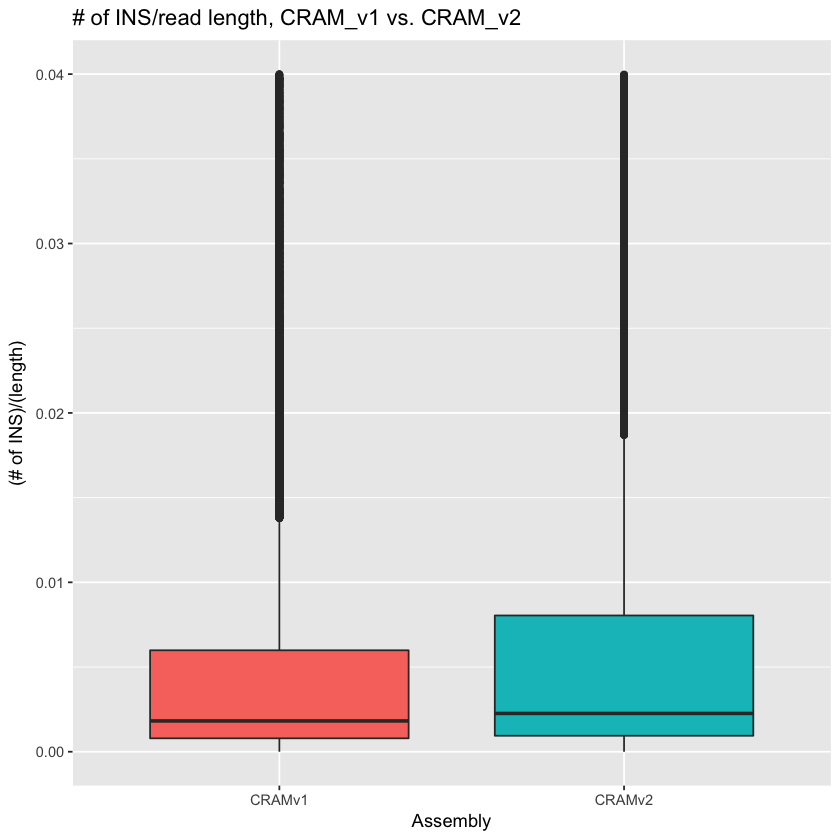

In [10]:
pp = ggplot(final, aes(assembly, INS_readLength, fill=assembly)) + geom_boxplot() + scale_y_continuous(limits=c(0,0.04)) +
     labs(title= "# of INS/read length, CRAM_v1 vs. CRAM_v2", x="Assembly", y = "(# of INS)/(length)")  + theme(legend.position="none")


## + scale_fill_brewer(palette="Dark2") 

### primary only!!
print(pp)

Warning message:
“Removed 101311 rows containing non-finite values (stat_boxplot).”

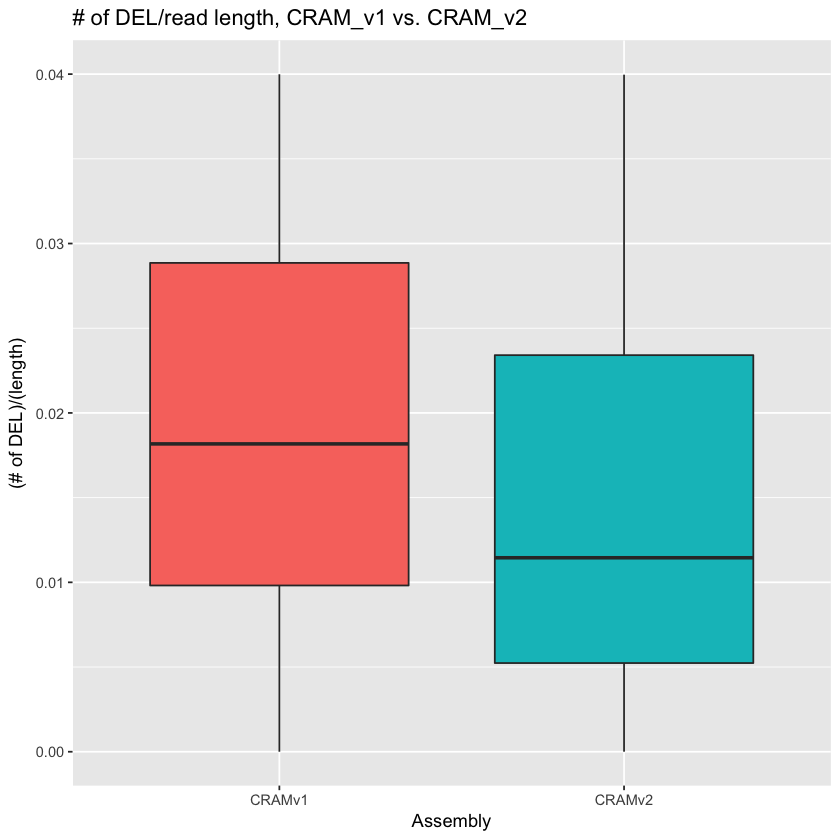

In [11]:

pp = ggplot(final, aes(assembly, DEL_readLength, fill=assembly)) + geom_boxplot() + scale_y_continuous(limits=c(0,0.04)) +
     labs(title= "# of DEL/read length, CRAM_v1 vs. CRAM_v2", x="Assembly", y = "(# of DEL)/(length)")  + theme(legend.position="none")


## + scale_fill_brewer(palette="Dark2") 

### primary only!!
print(pp)


Warning message:
“Removed 28629 rows containing non-finite values (stat_boxplot).”

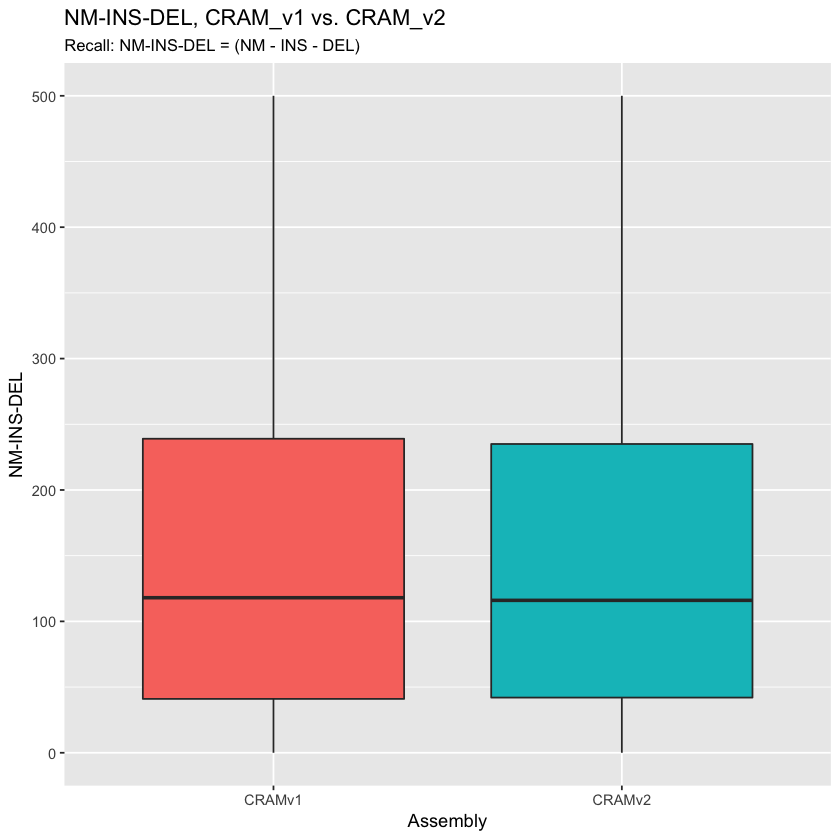

In [12]:

pp = ggplot(final, aes(assembly, NM_INS_DEL, fill=assembly)) + geom_boxplot() + scale_y_continuous(limits=c(0,500)) +
     labs(title= "NM-INS-DEL, CRAM_v1 vs. CRAM_v2", subtitle = "Recall: NM-INS-DEL = (NM - INS - DEL) ", x="Assembly", y = "NM-INS-DEL")  + theme(legend.position="none")


## + scale_fill_brewer(palette="Dark2") 

### primary only!!
print(pp)

### RECALL 
### df['NM_INS_DEL'] = df['NM'] - df['insertion'] - df['deletion']